In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_raw = pd.read_csv("rawdata/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 전처리 실시 

지난 번 과제와 동일한 데이터 세트를 사용한다. 지난 번 과제 정보 (결측치 없음, 범주형 변수 없음) 를 바탕으로 전처리를 실시한다. 

In [4]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 42)
print("Train data size\t: {}".format(df_train.shape))
print("Test data size\t: {}".format(df_test.shape))

df_train_x = df_train.drop(["diagnosis"], axis = 1)
df_train_y = df_train[["diagnosis"]]
df_test_x = df_test.drop(["diagnosis"], axis = 1)
df_test_y = df_test[["diagnosis"]]

Train data size	: (398, 31)
Test data size	: (171, 31)


### 모델 생성 - 기본 옵션으로 모델 생성

In [6]:
svc_uncustomized = SVC(random_state=1234, gamma = 'auto')
svc_uncustomized.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on training set: {:.3f}".format(svc_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svc_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 1.000
Accuracy on test set: 0.632


In [8]:
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range (-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234, gamma = "auto")
    svm.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.626,0.632
1,0.10,0.626,0.632
2,1.00,1.000,0.632
3,10.00,1.000,0.632


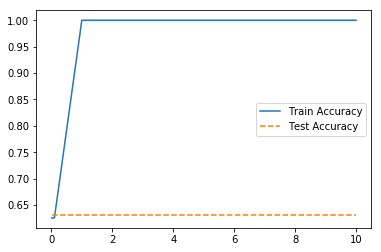

In [9]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [10]:
C = 0.1

In [12]:
train_accuracy = []; test_accuracy = []

para_gamma = [10**gamma for gamma in range (-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = C, random_state = 1234)
    svm.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["Gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.626,0.632
1,0.10,0.626,0.632
2,1.00,0.626,0.632
3,10.00,0.626,0.632


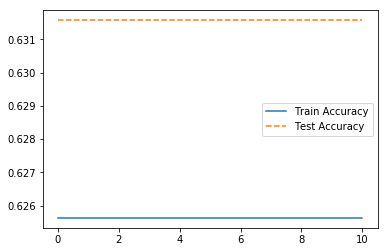

In [13]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [14]:
df_raw_x = df_raw.drop(["diagnosis"], axis = 1)

In [15]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [16]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [24]:
svm_scaled = SVC(random_state = 1234, gamma = "auto")
svm_scaled.fit(df_scaled_train_x, df_train_y.values.ravel())

print("Accuracy on training set :%.3f" % svm_scaled.score(df_scaled_train_x, df_train_y))
print("Accuracy on test set\t:%.3f" % svm_scaled.score(df_scaled_test_x, df_test_y))

Accuracy on training set :0.668
Accuracy on test set	:0.632


In [18]:
svm_scaled = SVC(random_state = 1234, gamma = "scale")
svm_scaled.fit(df_scaled_train_x, df_train_y.values.ravel())

print("Accuracy on training set :%.3f" % svm_scaled.score(df_scaled_train_x, df_train_y))
print("Accuracy on test set\t:%.3f" % svm_scaled.score(df_scaled_test_x, df_test_y))

Accuracy on training set :0.668
Accuracy on test set	:0.632


In [21]:
svm_uncustomized = SVC(random_state=1234, gamma = 'auto')
svm_uncustomized.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 1.000
Accuracy on test set: 0.632


In [22]:
svm_uncustomized = SVC(random_state=1234, gamma = 'scale')
svm_uncustomized.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 0.899
Accuracy on test set: 0.936


In [26]:
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range (-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234, gamma = "scale")
    svm.fit(df_scaled_train_x, df_train_y.values.ravel())
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.626,0.632
1,0.10,0.626,0.632
2,1.00,0.668,0.632
3,10.00,0.842,0.567


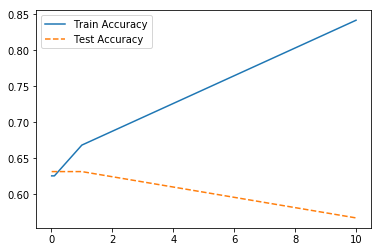

In [28]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [29]:
scaled_C = 1

In [31]:
train_accuracy = []; test_accuracy = []

para_gamma = [10**gamma for gamma in range (-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = scaled_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y.values.ravel())
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["Gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.628,0.632
1,0.10,0.794,0.614
2,1.00,1.000,0.632
3,10.00,1.000,0.632


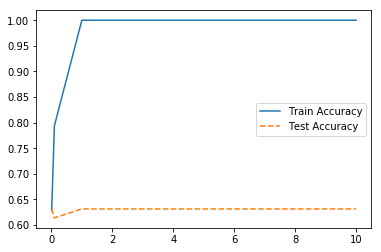

In [32]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

### 결론 도출 - 최종 모델 도출

In [40]:
svc_final = SVC(random_state = 1234, gamma ='scale')
svc_final.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on")
print("Uncustomzed\t training: {:.3f}".format(svc_uncustomized.score(df_train_x, df_train_y)))
print("Uncustomzed\t test\t : {:.3f}".format(svc_uncustomized.score(df_test_x, df_test_y)))
print("Tunned\t\t training: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Tunned\t\t test\t : {:.3f}".format(svc_final.score(df_test_x, df_test_y)))

y_pred = svc_final.predict(df_test_x)

Accuracy on
Uncustomzed	 training: 1.000
Uncustomzed	 test	 : 0.632
Tunned		 training: 0.899
Tunned		 test	 : 0.936


In [41]:
print("Confusion Matrix:")
print(confusion_matrix(df_test_y, y_pred))

Confusion Matrix:
[[108   0]
 [ 11  52]]
